# convert class labels to wordnet synset identifiers

(this is required to use CoOp on ImageNet without modifying CoOp)

TODO: move this into some ../utils/ script once you get it working

## load validation labels

In [10]:
val_img_labels = dict()
with open('../data/imagenet/devkit-1.0/data/ILSVRC2010_validation_ground_truth.txt') as f:
    for i, label in enumerate(f):
        val_img_labels[i+1] = int(label.strip()) - 1

In [11]:
assert len(val_img_labels) == 50000

## get label to synset dict

In [12]:
import scipy.io

In [14]:
mat = scipy.io.loadmat('../data/imagenet/devkit-1.0/data/meta.mat')
synset_id_to_int_label = {m[0][1][0]: m[0][0][0][0]-1 for m in mat['synsets']}
synset_id_to_class_name = {m[0][1][0]: m[0][2][0] for m in mat['synsets']}

int_label_to_synset = dict()
for synset_id in synset_id_to_int_label.keys():
    label = synset_id_to_int_label[synset_id]
    name = synset_id_to_class_name[synset_id]
    int_label_to_synset[label] = {'synset_id': synset_id, 'name': name}

## test it

In [15]:
import random
from IPython.display import display, Image, HTML, Markdown

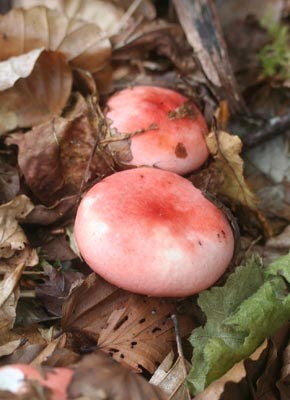

Image 25308: truffle, earthnut, earth-ball (synset ID: `n12985420`)

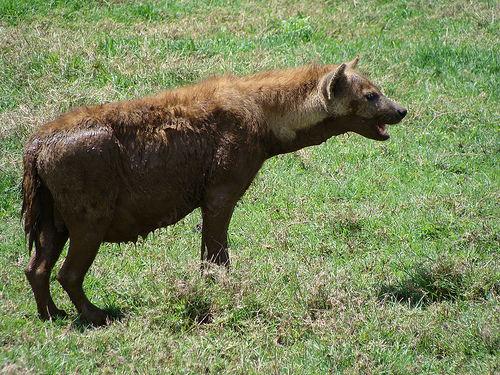

Image 4502: hyena, hyaena (synset ID: `n02117135`)

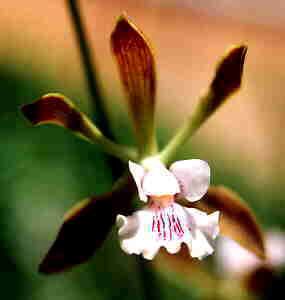

Image 7575: phaius (synset ID: `n12076223`)

In [16]:
for _ in range(3):
    img_idx = random.randint(1, 50001)
    img_path = f'../data/imagenet/images/val/ILSVRC2010_val_{img_idx:08d}.JPEG'
    img_label = val_img_labels[img_idx]
    synset = int_label_to_synset[img_label]
    synset_id = synset['synset_id']
    name = synset['name']

    display(Image(img_path))
    display(Markdown(f"Image {img_idx}: {name} (synset ID: `{synset_id}`)"))

# restructure imagenet validation folder

In [17]:
import os
import sys
import pickle
import shutil

In [ ]:
for img_idx in range(1, 50001):
#     img_idx = random.randint(1, 50001)
    img_path = f'../data/imagenet/images/val/ILSVRC2010_val_{img_idx:08d}.JPEG'
    img_label = val_img_labels[img_idx]
    synset = int_label_to_synset[img_label]
    synset_id = synset['synset_id']
    name = synset['name']

#     display(Image(img_path))
#     display(Markdown(f"Image {img_idx}: {name} (synset ID: `{synset_id}`)"))
    synset_id_dir = f'../data/imagenet/images/train/{synset_id}'
    if not os.path.exists(synset_id_dir):
        os.mkdir(synset_id_dir)
        with open(f'{synset_id_dir}/._SYNSET_.pickle', 'wb') as f:
            pickle.dump(synset, f)
    shutil.copy(img_path, synset_id_dir)

## confirm that this worked as intended

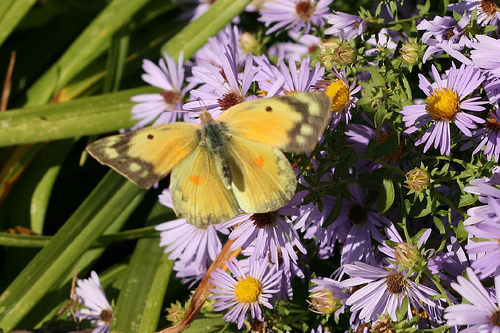

Image ILSVRC2010_val_00032227.JPEG: sulphur butterfly, sulfur butterfly (synset ID: `n02281406`)

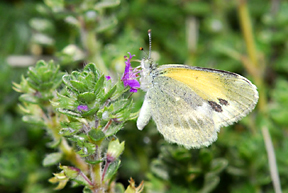

Image ILSVRC2010_val_00027922.JPEG: sulphur butterfly, sulfur butterfly (synset ID: `n02281406`)

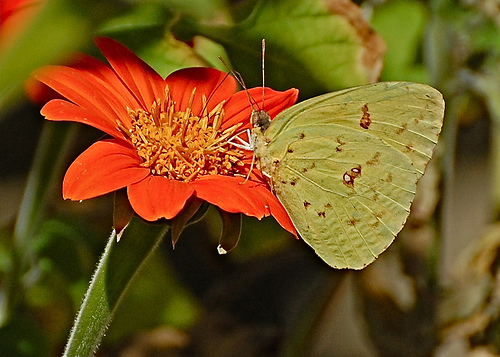

Image ILSVRC2010_val_00015270.JPEG: sulphur butterfly, sulfur butterfly (synset ID: `n02281406`)

In [19]:
rand_synset_id = random.choice(os.listdir('../data/imagenet/images/train/'))
synset_id_dir = f'../data/imagenet/images/train/{rand_synset_id}'

with open(f'{synset_id_dir}/._SYNSET_.pickle', 'rb') as f:
    synset = pickle.load(f)
assert rand_synset_id == synset['synset_id']

for _ in range(3):
    img_path = random.choice([x for x in os.listdir(synset_id_dir) if not 'pickle' in x])
    
    display(Image(f'{synset_id_dir}/{img_path}'))
    display(Markdown(f"Image {img_path}: {synset['name']} (synset ID: `{synset['synset_id']}`)"))

# get "simple labels"

CLIP uses ["simple labels"](https://github.com/anishathalye/imagenet-simple-labels) for zero-shot image classification on ImageNet, but we have to set these up for ILSVRC2010 (i.e. we can't re-use [CoOp's](https://github.com/KaiyangZhou/CoOp/blob/main/DATASETS.md#imagenet) bc, while the labels are the same, they occur in a different order)

In [21]:
int_label_to_synset

{0: {'synset_id': 'n07711080',
  'name': 'french fries, french-fried potatoes, fries, chips'},
 1: {'synset_id': 'n07711569', 'name': 'mashed potato'},
 2: {'synset_id': 'n07767549', 'name': 'black olive, ripe olive'},
 3: {'synset_id': 'n03314780', 'name': 'face powder'},
 4: {'synset_id': 'n07739344', 'name': 'crab apple, crabapple'},
 5: {'synset_id': 'n07742313', 'name': 'Granny Smith'},
 6: {'synset_id': 'n07745940', 'name': 'strawberry'},
 7: {'synset_id': 'n07743544', 'name': 'blueberry'},
 8: {'synset_id': 'n07743902', 'name': 'cranberry'},
 9: {'synset_id': 'n07744246', 'name': 'currant'},
 10: {'synset_id': 'n07744811', 'name': 'blackberry'},
 11: {'synset_id': 'n07745466', 'name': 'raspberry'},
 12: {'synset_id': 'n07746186', 'name': 'persimmon'},
 13: {'synset_id': 'n07767171', 'name': 'mulberry'},
 14: {'synset_id': 'n07747607', 'name': 'orange'},
 15: {'synset_id': 'n07749446', 'name': 'kumquat'},
 16: {'synset_id': 'n07749582', 'name': 'lemon'},
 17: {'synset_id': 'n0774

In [22]:
!wget https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
!mv imagenet1000_clsidx_to_labels.txt diff_imagenet_labelidx_to_names.json

--2022-04-23 16:53:09--  https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30564 (30K) [text/plain]
Saving to: ‘imagenet1000_clsidx_to_labels.txt’

imagenet1000_clsidx 100%[===================>]  29.85K  --.-KB/s    in 0s      

2022-04-23 16:53:09 (95.3 MB/s) - ‘imagenet1000_clsidx_to_labels.txt’ saved [30564/30564]



In [25]:
import ast

with open('diff_imagenet_labelidx_to_names.json') as f:
    diff_imagenet_labelidx_to_names = ast.literal_eval(f.read())

In [27]:
# make sure they have the same entries, even if they're in diff order

diff_imagenet_clsnames = diff_imagenet_labelidx_to_names.values()
imagenet_clsnames = synset_id_to_class_name.values()
for class_name in diff_imagenet_clsnames:
    assert class_name in imagenet_clsnames

AssertionError: 

It's not the same image classes as in [simple labels](https://github.com/anishathalye/imagenet-simple-labels). So we can't use them.

# did they use ILSVRC 2012? 

(given the below, it looks like "yes")

In [29]:
mat = scipy.io.loadmat('../data/imagenet/ILSVRC2012_devkit_t12/data/meta.mat')
synset_id_to_int_label2 = {m[0][1][0]: m[0][0][0][0]-1 for m in mat['synsets']}
synset_id_to_class_name2 = {m[0][1][0]: m[0][2][0] for m in mat['synsets']}

int_label_to_synset2 = dict()
for synset_id in synset_id_to_int_label2.keys():
    label = synset_id_to_int_label2[synset_id]
    name = synset_id_to_class_name2[synset_id]
    int_label_to_synset2[label] = {'synset_id': synset_id, 'name': name}

In [31]:
diff_imagenet_clsnames = diff_imagenet_labelidx_to_names.values()
imagenet_clsnames = synset_id_to_class_name2.values()
for class_name in diff_imagenet_clsnames:
    assert class_name in imagenet_clsnames

In [ ]:
# !rm diff_imagenet_labelidx_to_names.json